In [119]:
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting()

In [183]:
l, g, r, eps, w_0, A = sym.symbols(r'l, g, r, \epsilon, \omega_0, A', postive=True)
t = sym.symbols('t')
eta = sym.Function(r'\eta')(t)
eta = sym.symbols(r'\eta')
theta = sym.Function('theta')(t)

a_0 = sym.Function('a_0')(t)
a_1 = sym.Function('a_1')(t)

### Equations of Motion
$$ r \frac{d}{dt} (\eta^2 \dot{\theta}) + \frac{1}{3} \ddot{\theta} = - \frac{g}{l} (r \eta + \frac{1}{2}) \sin\theta$$
$$ \ddot{\eta} = \eta \dot{\theta}^2 + \frac{g}{l} \cos \theta $$

In [184]:
theta = a_0 + a_1 * eps
lhs_theta = eps * (eta ** 2 * theta.diff(t)).diff(t) + sym.Rational(1, 3) * theta.diff(t).diff(t)
rhs_theta = -(g / l) * (eps * eta + sym.Rational(1, 2)) * theta
eqofm_theta = lhs_theta.expand() - rhs_theta.expand()

In [185]:
eps_first_order = sym.collect(eqofm_theta.expand(), eps).coeff(eps, 1)
eps_first_order

In [186]:
eps_first_order.subs(a_1, A * sym.cos(w_0 * t))

                                              2                  
                                             ∂                   
                                            ───(A⋅cos(\omega₀⋅t))
                                              2                  
A⋅g⋅cos(\omega₀⋅t)       2      \eta⋅g⋅a₀   ∂t                   
────────────────── + \eta ⋅a₀̈ + ───────── + ─────────────────────
       2⋅l                          l                 3          

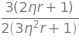

In [191]:
sym.simplify((r * eta + sym.Rational(1, 2))/(r * eta ** 2 + sym.Rational(1, 3)))

In [192]:
x, m, M, l = sym.symbols('x, m, M, l', positive=True)

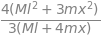

In [194]:
sym.simplify((m * x**2 + sym.Rational(1,3) * M * l**2)/(m * x + sym.Rational(1,2) * M * l / 2))